In [3]:
# Imports
import pandas as pd
import time
from tqdm import tqdm

import numpy as np
from numpy.lib.format import open_memmap

import matplotlib.pyplot as plt
%matplotlib inline

from pycbc.types.timeseries import TimeSeries
from pycbc.waveform import get_td_waveform

(2, 36864)


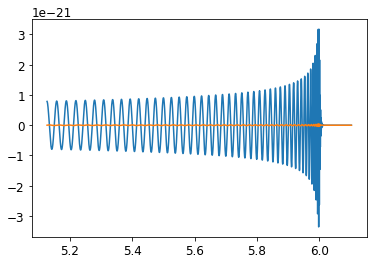

In [4]:
# Load current example I am curious about
parameters = pd.read_csv('./data/test_snr_gen/parameters.csv')
waveforms = open_memmap('./data/test_snr_gen/waveforms.npy', dtype=np.float64, mode='r')

print(np.shape(waveforms[0]))

hp = TimeSeries(waveforms[8,0], delta_t=1.0/4096)
hc = TimeSeries(waveforms[8,1], delta_t=1.0/4096)

plt.plot(hp.sample_times[21000:25000], hp[21000:25000])
plt.plot(hc.sample_times[21000:25000], hc[21000:25000])
plt.show()

1.5647751442349198
4329
4329


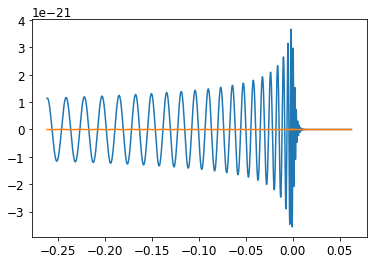

In [5]:
# Sample 9
start_time = time.time()

idx = 8

m1 = parameters.iloc[idx]['mass_2']
m2 = parameters.iloc[idx]['mass_1']
spin1z = parameters.iloc[idx]['a_1']
spin2z = parameters.iloc[idx]['a_2']
incl = parameters.iloc[idx]['theta_jn']
phase = parameters.iloc[idx]['phase']
ra = parameters.iloc[idx]['ra']
dec = parameters.iloc[idx]['dec']
pol = parameters.iloc[idx]['psi']

print(incl)

hp, hc = get_td_waveform(approximant='SEOBNRv4',
                        mass1=m1,
                        mass2=m2,
                        spin1z=spin1z,
                        spin2z=spin2z,
                        inclination=1.57*3,
                        coa_phase=phase,
                        distance=50,
                        delta_t=1.0/4096,
                        f_lower=30)

print(len(hp.data))
print(len(hc.data))

plt.plot(hp.sample_times[3000:], hp[3000:])
plt.plot(hc.sample_times[3000:], hc[3000:])
plt.show()

In [6]:
scales = []
inclinations = np.arange(start=0, stop=2*3.141, step=0.02)
for inc in tqdm(inclinations):
    hp, hc = get_td_waveform(approximant='SEOBNRv4',
                        mass1=m1,
                        mass2=m2,
                        spin1z=spin1z,
                        spin2z=spin2z,
                        inclination=inc,
                        coa_phase=phase,
                        distance=50,
                        delta_t=1.0/4096,
                        f_lower=30)
    scales.append(max(abs(hp.data)) / max(abs(hc.data)))


100%|█████████████████████████████████████████████████████████████████████████████████| 315/315 [03:58<00:00,  1.32it/s]


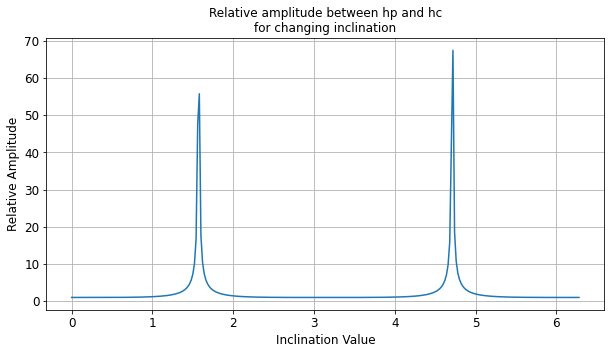

In [8]:
plt.figure(figsize=(10,5))
plt.plot(inclinations, scales)
plt.title('Relative amplitude between hp and hc\nfor changing inclination')
plt.xlabel('Inclination Value')
plt.ylabel('Relative Amplitude')
plt.grid()
plt.show()